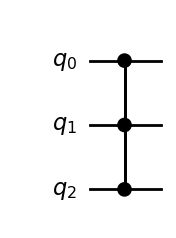

In [6]:
#from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit.circuit.library import MCMT
from qiskit.circuit.library.standard_gates import SGate, TGate
from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2, FakeAuckland, FakeWashingtonV2, FakeCambridgeV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import matplotlib.pyplot as plt
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator
import numpy as np
cczgate = QuantumCircuit(3)

cczgate.ccz(0,1,2)

cczgate.draw('mpl',style="bw")

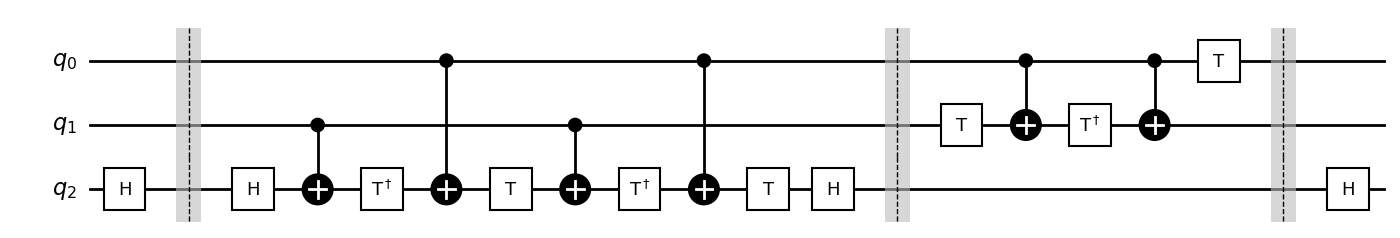

In [7]:
qc = QuantumCircuit(3)

qc.h(2)
qc.barrier()

qc.h(2)
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.t(2)
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.t(2)
qc.h(2)

qc.barrier()

qc.t(1)
qc.cx(0,1)
qc.tdg(1)
qc.cx(0,1)
qc.t(0)

qc.barrier()
qc.h(2)


qc.draw('mpl',style='bw')


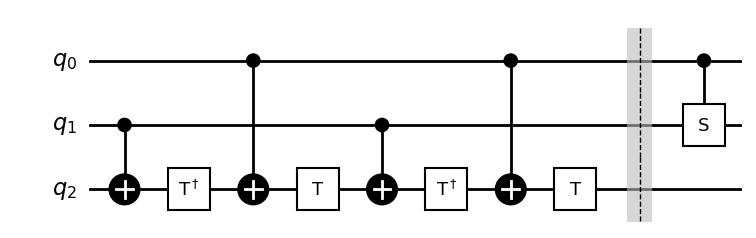

In [8]:
qcs = QuantumCircuit(3)



qcs.cx(1,2)
qcs.tdg(2)
qcs.cx(0,2)
qcs.t(2)
qcs.cx(1,2)
qcs.tdg(2)
qcs.cx(0,2)
qcs.t(2)

qcs.barrier()


csgate = SGate().control(1)

qcs.append(csgate, [0, 1])



qcs.draw('mpl', style='bw')

In [14]:
qcs = QuantumCircuit(3)



qcs.cx(1,2)
qcs.tdg(2)
qcs.cx(0,2)
qcs.t(2)
qcs.cx(1,2)
qcs.tdg(2)
qcs.cx(0,2)
qcs.t(2)

qcs.barrier()


csgate = SGate().control(1)

qcs.append(csgate, [0, 1])



qcs.draw('mpl', style='bw')
print(qcs)

                                                  ░      
q_0: ──────────────■─────────────────────■────────░───■──
                   │                     │        ░ ┌─┴─┐
q_1: ──■───────────┼─────────■───────────┼────────░─┤ S ├
     ┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐ ░ └───┘
q_2: ┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─░──────
     └───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ ░      


In [16]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

                                                     ░                       »
   q_0: ──────────────■─────────────────────■────────░─────────────■─────────»
                      │                     │        ░ ┌───┐┌───┐┌─┴─┐┌─────┐»
   q_1: ──■───────────┼─────────■───────────┼────────░─┤ H ├┤ T ├┤ X ├┤ Tdg ├»
        ┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐ ░ └───┘└───┘└───┘└─────┘»
   q_2: ┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─░───────────────────────»
        └───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ ░                       »
meas: 3/═════════════════════════════════════════════════════════════════════»
                                                                             »
«                   ░ ┌─┐      
«   q_0: ──■────────░─┤M├──────
«        ┌─┴─┐┌───┐ ░ └╥┘┌─┐   
«   q_1: ┤ X ├┤ H ├─░──╫─┤M├───
«        └───┘└───┘ ░  ║ └╥┘┌─┐
«   q_2: ───────────░──╫──╫─┤M├
«                   ░  ║  ║ └╥┘
«meas: 3/══════════════╩══╩══╩═
«                      0  1  2 


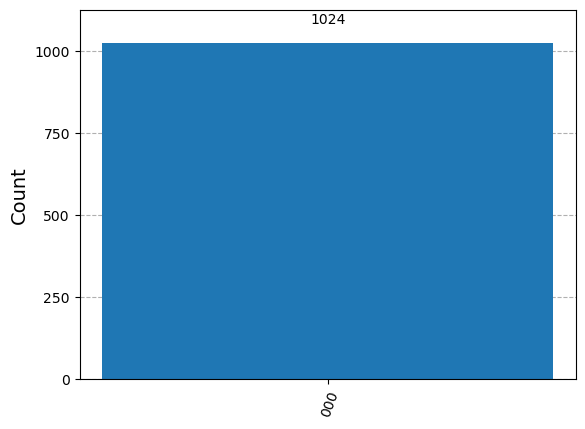

In [39]:
# System Specification
n_qubits = 3
qcs = QuantumCircuit(n_qubits)

# Test Circuit
qcs.cx(1, 2)
qcs.tdg(2)
qcs.cx(0, 2)
qcs.t(2)
qcs.cx(1, 2)
qcs.tdg(2)
qcs.cx(0, 2)
qcs.t(2)

qcs.barrier()

# Controlled-S Gate (decomposed manually to avoid simulator error)
qcs.h(1)
qcs.t(1)
qcs.cx(0, 1)
qcs.tdg(1)
qcs.cx(0, 1)
qcs.h(1)

# Add measurements
qcs.measure_all()
print(qcs)

sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(qcs).result()
plot_histogram(result_ideal.get_counts(0))

In [31]:
# Example error probabilities
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['cx', 'u1', 'u3', 'reset', 'measure', 'u2']
  All-qubits errors: ['reset', 'measure', 'u1', 'u2', 'u3', 'cx']


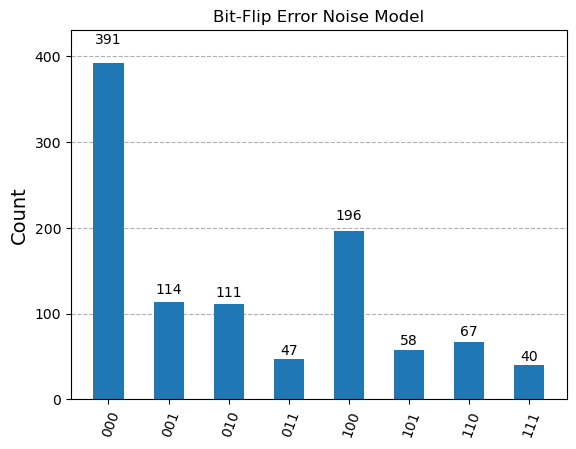

In [34]:
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_bit_flip)

# Transpile circuit for noisy basis gates
qcs_tnoise = transpile(qcs, sim_noise)

# Run and get counts
result_bit_flip = sim_noise.run(qcs_tnoise).result()
counts_bit_flip = result_bit_flip.get_counts(0)

# Plot noisy output
plot_histogram(counts_bit_flip,title="Bit-Flip Error Noise Model")

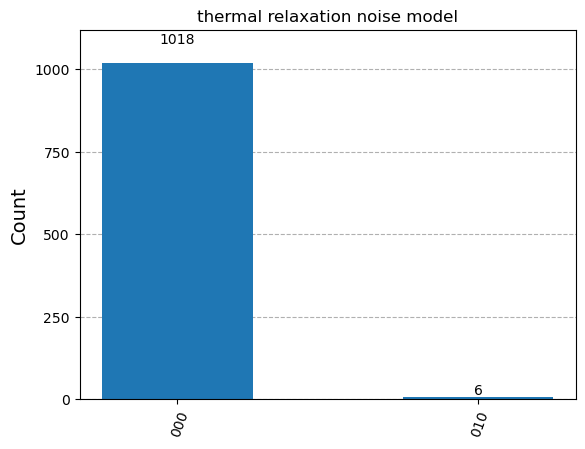

In [38]:
# System Specification
n_qubits = 3
qcs = QuantumCircuit(n_qubits)

# Test Circuit
qcs.cx(1, 2)
qcs.tdg(2)
qcs.cx(0, 2)
qcs.t(2)
qcs.cx(1, 2)
qcs.tdg(2)
qcs.cx(0, 2)
qcs.t(2)

qcs.barrier()

# Controlled-S Gate (decomposed manually to avoid simulator error)
qcs.h(1)
qcs.t(1)
qcs.cx(0, 1)
qcs.tdg(1)
qcs.cx(0, 1)
qcs.h(1)

# Add measurements
qcs.measure_all()

# Thermal relaxation parameters (example values)
T1s = np.random.normal(50e3, 10e3, 3)  # T1 values in microseconds
T2s = np.random.normal(70e3, 10e3, 3)  # T2 values in microseconds

# Truncate random T2s <= T1s
T2s = np.array([min(T2s[j], 2 * T1s[j]) for j in range(3)])

# Instruction times (in nanoseconds)
time_u1 = 0   # virtual gate
time_u2 = 50  # (single X90 pulse)
time_u3 = 100 # (two X90 pulses)
time_cx = 300
time_reset = 1000  # 1 microsecond
time_measure = 1000 # 1 microsecond

# QuantumError objects
errors_reset = [thermal_relaxation_error(t1, t2, time_reset)
                for t1, t2 in zip(T1s, T2s)]
errors_measure = [thermal_relaxation_error(t1, t2, time_measure)
                  for t1, t2 in zip(T1s, T2s)]
errors_u1  = [thermal_relaxation_error(t1, t2, time_u1)
              for t1, t2 in zip(T1s, T2s)]
errors_u2  = [thermal_relaxation_error(t1, t2, time_u2)
              for t1, t2 in zip(T1s, T2s)]
errors_u3  = [thermal_relaxation_error(t1, t2, time_u3)
              for t1, t2 in zip(T1s, T2s)]
errors_cx = [[thermal_relaxation_error(t1a, t2a, time_cx).expand(
             thermal_relaxation_error(t1b, t2b, time_cx))
              for t1a, t2a in zip(T1s, T2s)]
               for t1b, t2b in zip(T1s, T2s)]

# Add errors to noise model
noise_thermal = NoiseModel()
for j in range(3):
    noise_thermal.add_quantum_error(errors_reset[j], "reset", [j])
    noise_thermal.add_quantum_error(errors_measure[j], "measure", [j])
    noise_thermal.add_quantum_error(errors_u1[j], "u1", [j])
    noise_thermal.add_quantum_error(errors_u2[j], "u2", [j])
    noise_thermal.add_quantum_error(errors_u3[j], "u3", [j])
    for k in range(3):
        noise_thermal.add_quantum_error(errors_cx[j][k], "cx", [j, k])

# Create the noisy simulator backend
sim_thermal = AerSimulator(noise_model=noise_thermal)

# Transpile circuit for noisy basis gates
circ_tthermal = transpile(qcs, sim_thermal)

# Run the simulation with the noisy model
result_thermal = sim_thermal.run(circ_tthermal).result()

# Get the counts (measurement results)
counts_thermal = result_thermal.get_counts()

# Plot the noisy output
plot_histogram(counts_thermal,title="thermal relaxation noise model")

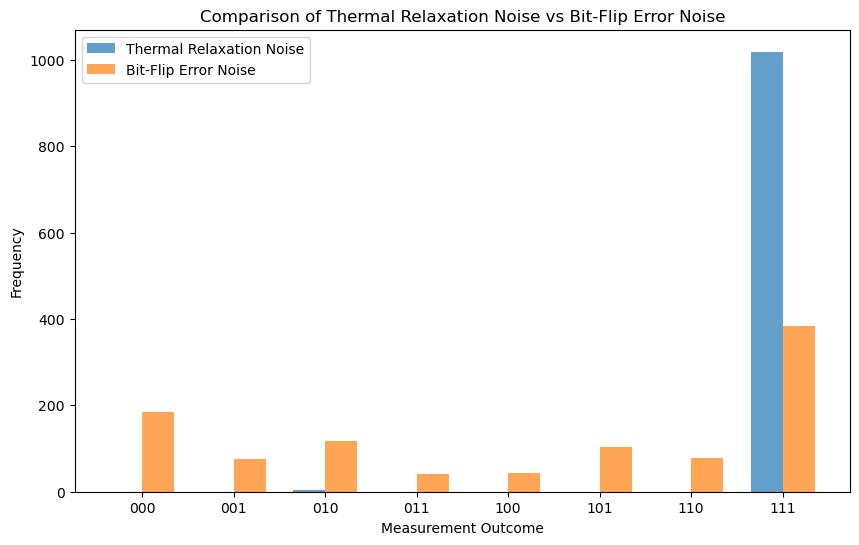

In [46]:
import numpy as np

from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# System Specification
n_qubits = 3
qcs = QuantumCircuit(n_qubits)

# Test Circuit
qcs.cx(1, 2)
qcs.tdg(2)
qcs.cx(0, 2)
qcs.t(2)
qcs.cx(1, 2)
qcs.tdg(2)
qcs.cx(0, 2)
qcs.t(2)

qcs.barrier()

# Controlled-S Gate (decomposed manually to avoid simulator error)
qcs.h(1)
qcs.t(1)
qcs.cx(0, 1)
qcs.tdg(1)
qcs.cx(0, 1)
qcs.h(1)

# Add measurements
qcs.measure_all()

# Thermal relaxation parameters (example values)
T1s = np.random.normal(50e3, 10e3, 3)  # T1 values in microseconds
T2s = np.random.normal(70e3, 10e3, 3)  # T2 values in microseconds

# Truncate random T2s <= T1s
T2s = np.array([min(T2s[j], 2 * T1s[j]) for j in range(3)])

# Instruction times (in nanoseconds)
time_u1 = 0   # virtual gate
time_u2 = 50  # (single X90 pulse)
time_u3 = 100 # (two X90 pulses)
time_cx = 300
time_reset = 1000  # 1 microsecond
time_measure = 1000 # 1 microsecond

# QuantumError objects for thermal relaxation errors
errors_reset = [thermal_relaxation_error(t1, t2, time_reset)
                for t1, t2 in zip(T1s, T2s)]
errors_measure = [thermal_relaxation_error(t1, t2, time_measure)
                  for t1, t2 in zip(T1s, T2s)]
errors_u1  = [thermal_relaxation_error(t1, t2, time_u1)
              for t1, t2 in zip(T1s, T2s)]
errors_u2  = [thermal_relaxation_error(t1, t2, time_u2)
              for t1, t2 in zip(T1s, T2s)]
errors_u3  = [thermal_relaxation_error(t1, t2, time_u3)
              for t1, t2 in zip(T1s, T2s)]
errors_cx = [[thermal_relaxation_error(t1a, t2a, time_cx).expand(
             thermal_relaxation_error(t1b, t2b, time_cx))
              for t1a, t2a in zip(T1s, T2s)]
               for t1b, t2b in zip(T1s, T2s)]

# QuantumError objects for bit-flip error model
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05

# Bit-flip errors
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X', p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add bit-flip errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

# Add thermal relaxation errors to noise model
noise_thermal = NoiseModel()
for j in range(3):
    noise_thermal.add_quantum_error(errors_reset[j], "reset", [j])
    noise_thermal.add_quantum_error(errors_measure[j], "measure", [j])
    noise_thermal.add_quantum_error(errors_u1[j], "u1", [j])
    noise_thermal.add_quantum_error(errors_u2[j], "u2", [j])
    noise_thermal.add_quantum_error(errors_u3[j], "u3", [j])
    for k in range(3):
        noise_thermal.add_quantum_error(errors_cx[j][k], "cx", [j, k])

# Create the noisy simulator backend for thermal relaxation noise
sim_thermal = AerSimulator(noise_model=noise_thermal)
circ_tthermal = transpile(qcs, sim_thermal)
result_thermal = sim_thermal.run(circ_tthermal).result()
counts_thermal = result_thermal.get_counts()

# Create the noisy simulator backend for bit-flip error noise
sim_bit_flip = AerSimulator(noise_model=noise_bit_flip)
circ_tbit_flip = transpile(qcs, sim_bit_flip)
result_bit_flip = sim_bit_flip.run(circ_tbit_flip).result()
counts_bit_flip = result_bit_flip.get_counts()

# Get the union of all keys (outcomes) from both noise models
all_outcomes = set(counts_thermal.keys()).union(set(counts_bit_flip.keys()))

# Create lists for frequencies, padding with 0 where necessary
thermal_values = [counts_thermal.get(outcome, 0) for outcome in all_outcomes]
bit_flip_values = [counts_bit_flip.get(outcome, 0) for outcome in all_outcomes]

# Convert the outcomes to a sorted list to keep the order consistent
all_outcomes = sorted(list(all_outcomes))

# Plot the results using bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define the bar width and positions for the bars
bar_width = 0.35
index = np.arange(len(all_outcomes))

# Plot thermal relaxation noise counts
ax.bar(index, thermal_values, bar_width, label='Thermal Relaxation Noise', alpha=0.7)

# Plot bit-flip error noise counts
ax.bar(index + bar_width, bit_flip_values, bar_width, label='Bit-Flip Error Noise', alpha=0.7)

ax.set_xlabel('Measurement Outcome')
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Thermal Relaxation Noise vs Bit-Flip Error Noise')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(all_outcomes)
ax.legend()

plt.show()


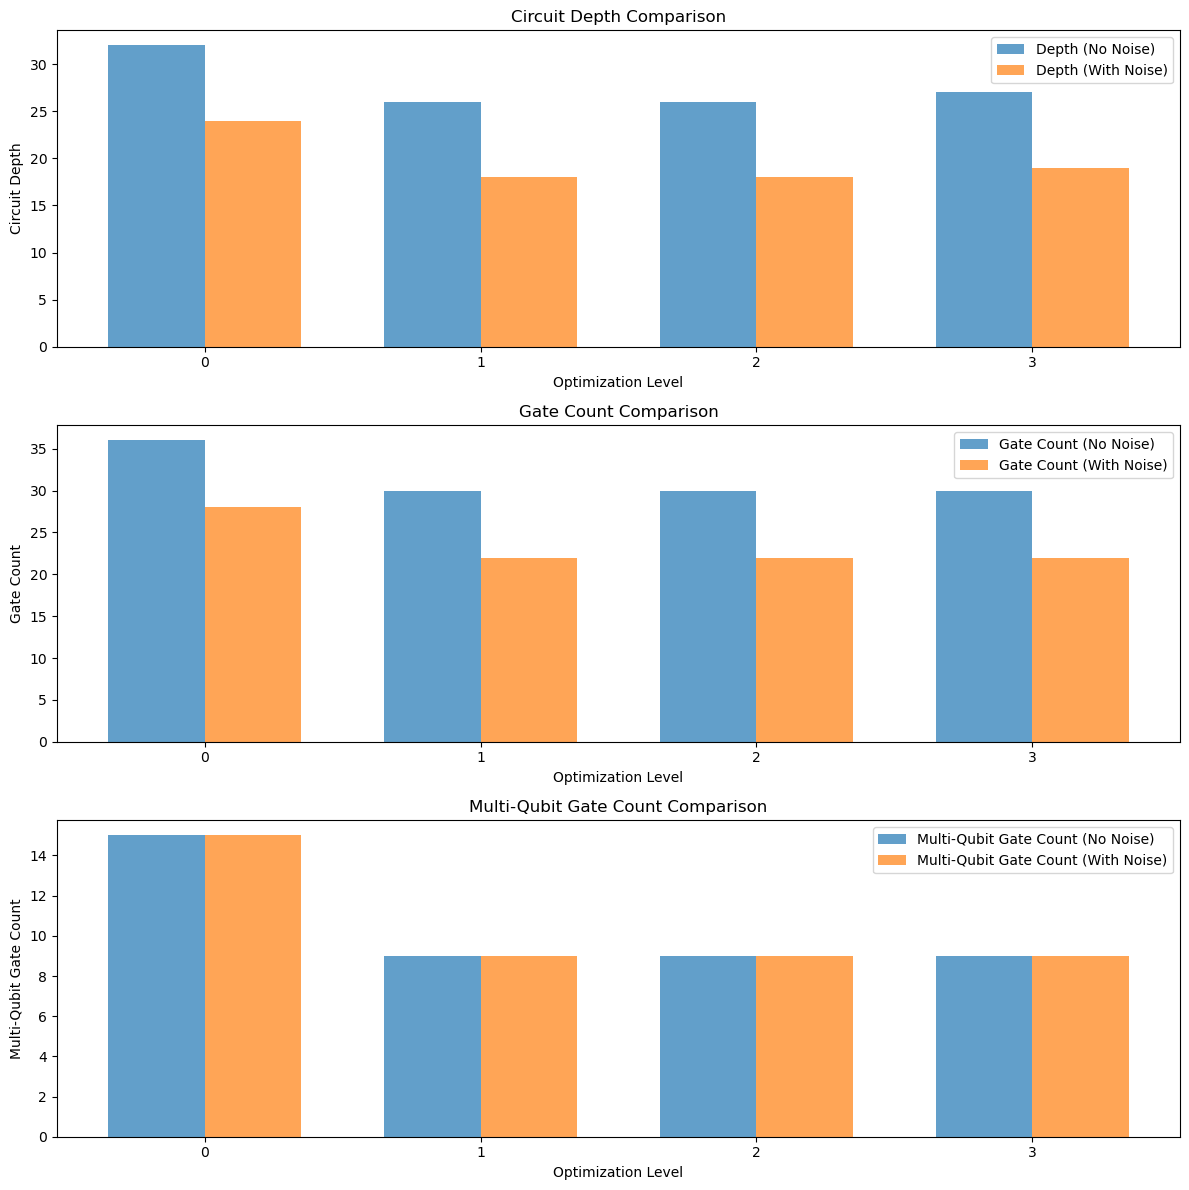

In [58]:

import matplotlib.pyplot as plt
import numpy as np

# Define the new circuit
qc = QuantumCircuit(3)

qc.h(2)
qc.barrier()

qc.h(2)
qc.cx(1, 2)
qc.tdg(2)
qc.cx(0, 2)
qc.t(2)
qc.cx(1, 2)
qc.tdg(2)
qc.cx(0, 2)
qc.t(2)
qc.h(2)

qc.barrier()

qc.t(1)
qc.cx(0, 1)
qc.tdg(1)
qc.cx(0, 1)
qc.t(0)

qc.barrier()
qc.h(2)

# Define the bit-flip noise model
p_bit_flip = 0.05

# Single-qubit bit-flip error
bit_flip_single = pauli_error([('X', p_bit_flip), ('I', 1 - p_bit_flip)])

# Two-qubit error (simplified model, same bit-flip applied independently to both qubits)
bit_flip_two_qubit = bit_flip_single.tensor(bit_flip_single)

# Noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(bit_flip_single, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(bit_flip_two_qubit, ["cx"])

# Initialize backend and results lists
backend = FakeJakartaV2()  # Backend with 7 qubits
sim_noise = AerSimulator(noise_model=noise_bit_flip)

depths = []
gate_counts = []
multiqubit_gate_counts = []
noisy_depths = []
noisy_gate_counts = []
noisy_multiqubit_gate_counts = []

levels = [str(x) for x in range(4)]

for level in range(4):
    # Generate pass manager for each optimization level
    pass_manager = generate_preset_pass_manager(
        optimization_level=level,
        backend=backend,
    )

    # Transpile circuit for the backend
    circ = pass_manager.run(qc)
    circ = transpile(circ, backend=backend)

    depths.append(circ.depth())
    gate_counts.append(sum(circ.count_ops().values()))
    multiqubit_gate_counts.append(circ.count_ops().get("cx", 0))

    # Apply noise model
    circ_tnoise = transpile(circ, backend=sim_noise)  # Transpile for noise simulator
    noisy_depths.append(circ_tnoise.depth())
    noisy_gate_counts.append(sum(circ_tnoise.count_ops().values()))
    noisy_multiqubit_gate_counts.append(circ_tnoise.count_ops().get("cx", 0))

# Plot results as bar charts
index = np.arange(len(levels))
bar_width = 0.35

fig, ax = plt.subplots(3, 1, figsize=(12, 12))

# Plot depths
ax[0].bar(index, depths, bar_width, label="Depth (No Noise)", alpha=0.7)
ax[0].bar(index + bar_width, noisy_depths, bar_width, label="Depth (With Noise)", alpha=0.7)
ax[0].set_xlabel('Optimization Level')
ax[0].set_ylabel('Circuit Depth')
ax[0].set_title('Circuit Depth Comparison')
ax[0].set_xticks(index + bar_width / 2)
ax[0].set_xticklabels(levels)
ax[0].legend()

# Plot gate counts
ax[1].bar(index, gate_counts, bar_width, label="Gate Count (No Noise)", alpha=0.7)
ax[1].bar(index + bar_width, noisy_gate_counts, bar_width, label="Gate Count (With Noise)", alpha=0.7)
ax[1].set_xlabel('Optimization Level')
ax[1].set_ylabel('Gate Count')
ax[1].set_title('Gate Count Comparison')
ax[1].set_xticks(index + bar_width / 2)
ax[1].set_xticklabels(levels)
ax[1].legend()

# Plot multi-qubit gate counts
ax[2].bar(index, multiqubit_gate_counts, bar_width, label="Multi-Qubit Gate Count (No Noise)", alpha=0.7)
ax[2].bar(index + bar_width, noisy_multiqubit_gate_counts, bar_width, label="Multi-Qubit Gate Count (With Noise)", alpha=0.7)
ax[2].set_xlabel('Optimization Level')
ax[2].set_ylabel('Multi-Qubit Gate Count')
ax[2].set_title('Multi-Qubit Gate Count Comparison')
ax[2].set_xticks(index + bar_width / 2)
ax[2].set_xticklabels(levels)
ax[2].legend()

plt.tight_layout()
plt.show()


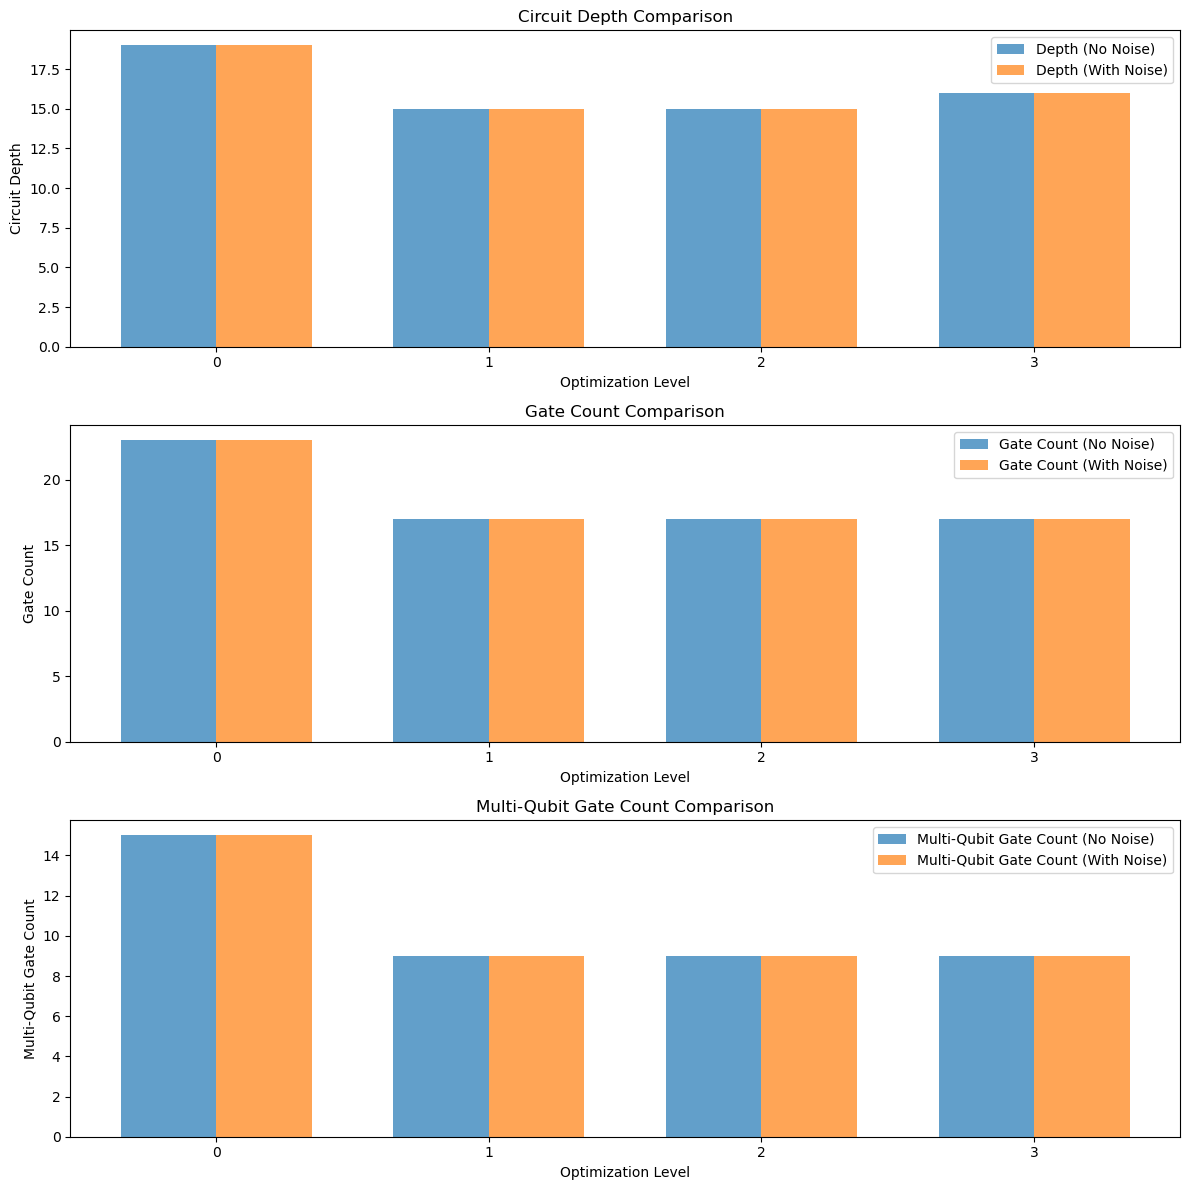

In [59]:

import matplotlib.pyplot as plt
import numpy as np

# Define the circuit
qcs = QuantumCircuit(3)

qcs.cx(1, 2)
qcs.tdg(2)
qcs.cx(0, 2)
qcs.t(2)
qcs.cx(1, 2)
qcs.tdg(2)
qcs.cx(0, 2)
qcs.t(2)

qcs.barrier()

csgate = SGate().control(1)
qcs.append(csgate, [0, 1])  # Add Controlled-S Gate

# Define the bit-flip noise model
p_bit_flip = 0.05

# Single-qubit bit-flip error
bit_flip_single = pauli_error([('X', p_bit_flip), ('I', 1 - p_bit_flip)])

# Two-qubit error (simplified model, same bit-flip applied independently to both qubits)
bit_flip_two_qubit = bit_flip_single.tensor(bit_flip_single)

# Noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(bit_flip_single, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(bit_flip_two_qubit, ["cx"])

# Initialize backend and results lists
backend = FakeJakartaV2()  # Backend with 7 qubits
sim_noise = AerSimulator(noise_model=noise_bit_flip)

depths = []
gate_counts = []
multiqubit_gate_counts = []
noisy_depths = []
noisy_gate_counts = []
noisy_multiqubit_gate_counts = []

levels = [str(x) for x in range(4)]

for level in range(4):
    # Generate pass manager for each optimization level
    pass_manager = generate_preset_pass_manager(
        optimization_level=level,
        backend=backend,
    )

    # Transpile circuit for the backend
    circ = pass_manager.run(qcs)
    circ = transpile(circ, backend=backend)

    depths.append(circ.depth())
    gate_counts.append(sum(circ.count_ops().values()))
    multiqubit_gate_counts.append(circ.count_ops().get("cx", 0))

    # Apply noise model
    circ_tnoise = transpile(circ, backend=sim_noise)  # Transpile for noise simulator
    noisy_depths.append(circ_tnoise.depth())
    noisy_gate_counts.append(sum(circ_tnoise.count_ops().values()))
    noisy_multiqubit_gate_counts.append(circ_tnoise.count_ops().get("cx", 0))

# Plot results as bar charts
index = np.arange(len(levels))
bar_width = 0.35

fig, ax = plt.subplots(3, 1, figsize=(12, 12))

# Plot depths
ax[0].bar(index, depths, bar_width, label="Depth (No Noise)", alpha=0.7)
ax[0].bar(index + bar_width, noisy_depths, bar_width, label="Depth (With Noise)", alpha=0.7)
ax[0].set_xlabel('Optimization Level')
ax[0].set_ylabel('Circuit Depth')
ax[0].set_title('Circuit Depth Comparison')
ax[0].set_xticks(index + bar_width / 2)
ax[0].set_xticklabels(levels)
ax[0].legend()

# Plot gate counts
ax[1].bar(index, gate_counts, bar_width, label="Gate Count (No Noise)", alpha=0.7)
ax[1].bar(index + bar_width, noisy_gate_counts, bar_width, label="Gate Count (With Noise)", alpha=0.7)
ax[1].set_xlabel('Optimization Level')
ax[1].set_ylabel('Gate Count')
ax[1].set_title('Gate Count Comparison')
ax[1].set_xticks(index + bar_width / 2)
ax[1].set_xticklabels(levels)
ax[1].legend()

# Plot multi-qubit gate counts
ax[2].bar(index, multiqubit_gate_counts, bar_width, label="Multi-Qubit Gate Count (No Noise)", alpha=0.7)
ax[2].bar(index + bar_width, noisy_multiqubit_gate_counts, bar_width, label="Multi-Qubit Gate Count (With Noise)", alpha=0.7)
ax[2].set_xlabel('Optimization Level')
ax[2].set_ylabel('Multi-Qubit Gate Count')
ax[2].set_title('Multi-Qubit Gate Count Comparison')
ax[2].set_xticks(index + bar_width / 2)
ax[2].set_xticklabels(levels)
ax[2].legend()

plt.tight_layout()
plt.show()


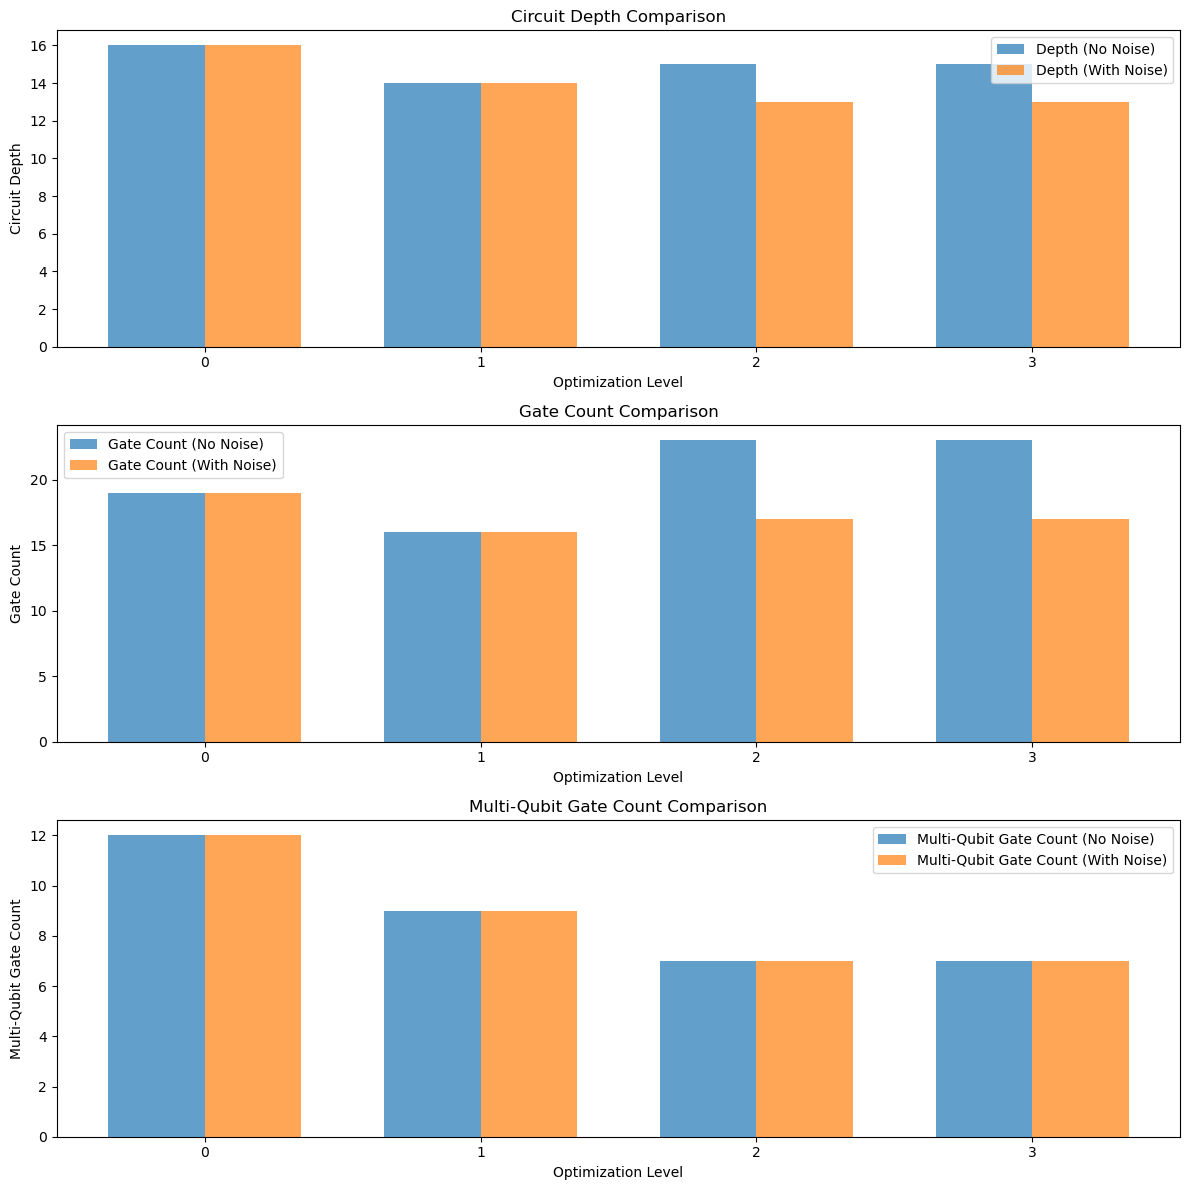

In [60]:

# Define the CCZ gate circuit
cczgate = QuantumCircuit(3)
cczgate.ccz(0, 1, 2)

# Define the bit-flip noise model
p_bit_flip = 0.05

# Single-qubit bit-flip error
bit_flip_single = pauli_error([('X', p_bit_flip), ('I', 1 - p_bit_flip)])

# Two-qubit error (simplified model, same bit-flip applied independently to both qubits)
bit_flip_two_qubit = bit_flip_single.tensor(bit_flip_single)

# Three-qubit error (simplified model)
bit_flip_three_qubit = bit_flip_two_qubit.tensor(bit_flip_single)

# Noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(bit_flip_single, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(bit_flip_two_qubit, ["cx"])
noise_bit_flip.add_all_qubit_quantum_error(bit_flip_three_qubit, ["ccx", "ccz"])

# Initialize backend and results lists
backend = FakeJakartaV2()  # Backend with 7 qubits
sim_noise = AerSimulator(noise_model=noise_bit_flip)

depths = []
gate_counts = []
multiqubit_gate_counts = []
noisy_depths = []
noisy_gate_counts = []
noisy_multiqubit_gate_counts = []

levels = [str(x) for x in range(4)]

for level in range(4):
    # Generate pass manager for each optimization level
    pass_manager = generate_preset_pass_manager(
        optimization_level=level,
        backend=backend,
    )

    # Transpile circuit for the backend
    circ = pass_manager.run(cczgate)
    circ = transpile(circ, backend=backend)

    depths.append(circ.depth())
    gate_counts.append(sum(circ.count_ops().values()))
    multiqubit_gate_counts.append(circ.count_ops().get("cx", 0) + circ.count_ops().get("ccx", 0))

    # Apply noise model
    circ_tnoise = transpile(circ, backend=sim_noise)  # Transpile for noise simulator
    noisy_depths.append(circ_tnoise.depth())
    noisy_gate_counts.append(sum(circ_tnoise.count_ops().values()))
    noisy_multiqubit_gate_counts.append(circ_tnoise.count_ops().get("cx", 0) + circ_tnoise.count_ops().get("ccx", 0))

# Plot results as bar charts
index = np.arange(len(levels))
bar_width = 0.35

fig, ax = plt.subplots(3, 1, figsize=(12, 12))

# Plot depths
ax[0].bar(index, depths, bar_width, label="Depth (No Noise)", alpha=0.7)
ax[0].bar(index + bar_width, noisy_depths, bar_width, label="Depth (With Noise)", alpha=0.7)
ax[0].set_xlabel('Optimization Level')
ax[0].set_ylabel('Circuit Depth')
ax[0].set_title('Circuit Depth Comparison')
ax[0].set_xticks(index + bar_width / 2)
ax[0].set_xticklabels(levels)
ax[0].legend()

# Plot gate counts
ax[1].bar(index, gate_counts, bar_width, label="Gate Count (No Noise)", alpha=0.7)
ax[1].bar(index + bar_width, noisy_gate_counts, bar_width, label="Gate Count (With Noise)", alpha=0.7)
ax[1].set_xlabel('Optimization Level')
ax[1].set_ylabel('Gate Count')
ax[1].set_title('Gate Count Comparison')
ax[1].set_xticks(index + bar_width / 2)
ax[1].set_xticklabels(levels)
ax[1].legend()

# Plot multi-qubit gate counts
ax[2].bar(index, multiqubit_gate_counts, bar_width, label="Multi-Qubit Gate Count (No Noise)", alpha=0.7)
ax[2].bar(index + bar_width, noisy_multiqubit_gate_counts, bar_width, label="Multi-Qubit Gate Count (With Noise)", alpha=0.7)
ax[2].set_xlabel('Optimization Level')
ax[2].set_ylabel('Multi-Qubit Gate Count')
ax[2].set_title('Multi-Qubit Gate Count Comparison')
ax[2].set_xticks(index + bar_width / 2)
ax[2].set_xticklabels(levels)
ax[2].legend()

plt.tight_layout()
plt.show()
